# Machine Learning Final Project

In [1]:
 #conda install -c plotly plotly=5.8.0
 #or
 #pip install plotly

**importing the libraries**

In [58]:

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
import time
from pandas import DataFrame

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV


In [59]:
#importing our cancer dataset
dataset = pd.read_csv('BRCA.csv')
dataset.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,9-Nov-18,Dead
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,8-Sep-17,9-Jun-18,Alive
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,6-May-17,27-Jun-19,Dead


In [60]:
#Drop NA 
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8876 entries, 0 to 9351
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          8876 non-null   object 
 1   Age                 8876 non-null   int64  
 2   Gender              8876 non-null   object 
 3   Protein1            8876 non-null   float64
 4   Protein2            8876 non-null   float64
 5   Protein3            8876 non-null   float64
 6   Protein4            8876 non-null   float64
 7   Tumour_Stage        8876 non-null   object 
 8   Histology           8876 non-null   object 
 9   ER status           8876 non-null   object 
 10  PR status           8876 non-null   object 
 11  HER2 status         8876 non-null   object 
 12  Surgery_type        8876 non-null   object 
 13  Date_of_Surgery     8876 non-null   object 
 14  Date_of_Last_Visit  8876 non-null   object 
 15  Patient_Status      8876 non-null   object 
dtypes: flo

## Data Cleaning 

**Drop irrelevant features and categorize some features**

In [61]:
dataset = dataset.drop(['ER status','PR status','Date_of_Surgery','Date_of_Last_Visit'],axis=1)
#ER:estrogen receptors
#PR: progesterone receptors
#ER & PR are all positive in our dataset
#dead = 0; alive = 1
dataset = dataset.replace(['Alive','Dead'],[1,0])
#Categorize data 
labelencoder_Y = LabelEncoder()
dataset['Gender'] = labelencoder_Y.fit_transform(dataset['Gender'])
dataset['Tumour_Stage'] = labelencoder_Y.fit_transform(dataset['Tumour_Stage'])
dataset['Histology'] = labelencoder_Y.fit_transform(dataset['Histology'])
dataset['HER2 status'] = labelencoder_Y.fit_transform(dataset['HER2 status'])
dataset['Surgery_type'] = labelencoder_Y.fit_transform(dataset['Surgery_type'])

#Dropped patient id
X = dataset.drop(['Patient_ID','Patient_Status'],axis=1)
Y = dataset['Patient_Status']

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8876 entries, 0 to 9351
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      8876 non-null   object 
 1   Age             8876 non-null   int64  
 2   Gender          8876 non-null   int64  
 3   Protein1        8876 non-null   float64
 4   Protein2        8876 non-null   float64
 5   Protein3        8876 non-null   float64
 6   Protein4        8876 non-null   float64
 7   Tumour_Stage    8876 non-null   int64  
 8   Histology       8876 non-null   int64  
 9   HER2 status     8876 non-null   int64  
 10  Surgery_type    8876 non-null   int64  
 11  Patient_Status  8876 non-null   int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 901.5+ KB


In [62]:
#Check there is null or na
dataset.isnull().sum()
dataset.isna().sum()

Patient_ID        0
Age               0
Gender            0
Protein1          0
Protein2          0
Protein3          0
Protein4          0
Tumour_Stage      0
Histology         0
HER2 status       0
Surgery_type      0
Patient_Status    0
dtype: int64

## EDA

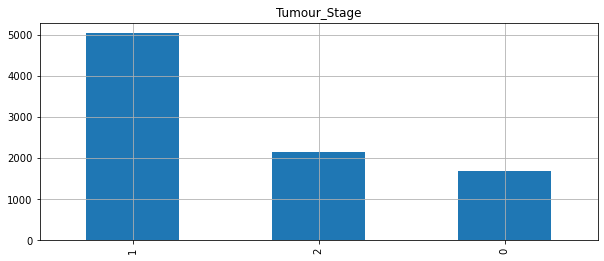

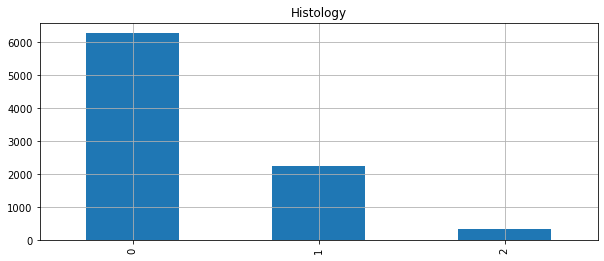

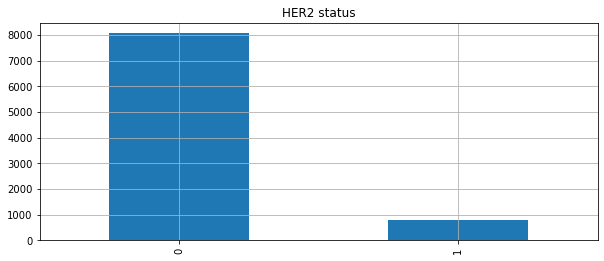

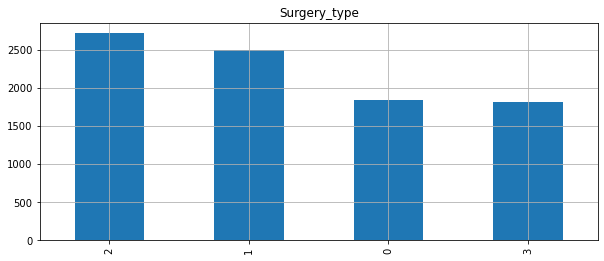

In [63]:
#Catogorical features histogram 
features_cat = ['Tumour_Stage', 'Histology','HER2 status', 'Surgery_type']

for f in features_cat:
    plt.figure(figsize=(10,4))
    dataset[f].value_counts().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

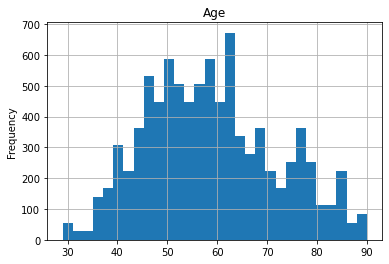

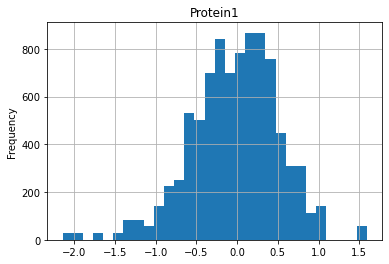

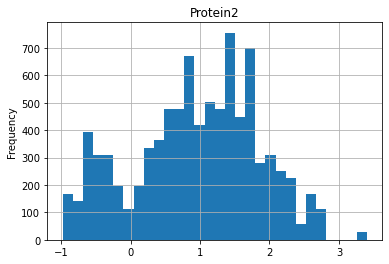

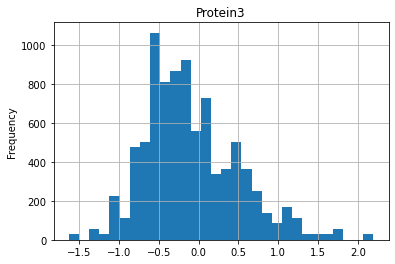

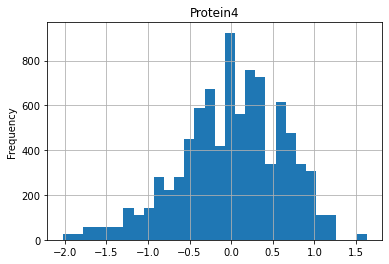

In [64]:
#Plot distribution of numerical features
features_num = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']
dataset[features_num].describe()
for f in features_num:
    dataset[f].plot(kind='hist', bins=30)
    plt.title(f)
    plt.grid()
    plt.show()
    

In [65]:
#In order to avoid undermine statistical significance of independent variables, 
#doing feature correlation plots shows there is no strong association between predictors

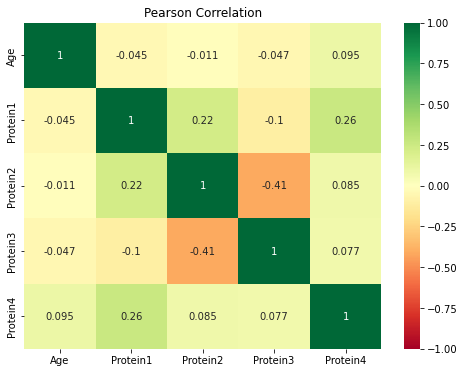

In [66]:
#Do a correlation for numerical features
corr_pearson = dataset[features_num].corr(method='pearson')


fig = plt.figure(figsize = (8,6))
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show()



In [67]:
# Protein levels by cancer types
type_slices = dataset[['Histology', 'Protein1', 'Protein2', 'Protein3', 'Protein4']]

In [68]:
idc = type_slices.loc[type_slices['Histology'] == 0][['Protein1','Protein2','Protein3','Protein4']]
ilc = type_slices.loc[type_slices['Histology'] == 1][['Protein1','Protein2','Protein3','Protein4']]
mcc = type_slices.loc[type_slices['Histology'] == 2][['Protein1','Protein2','Protein3','Protein4']]

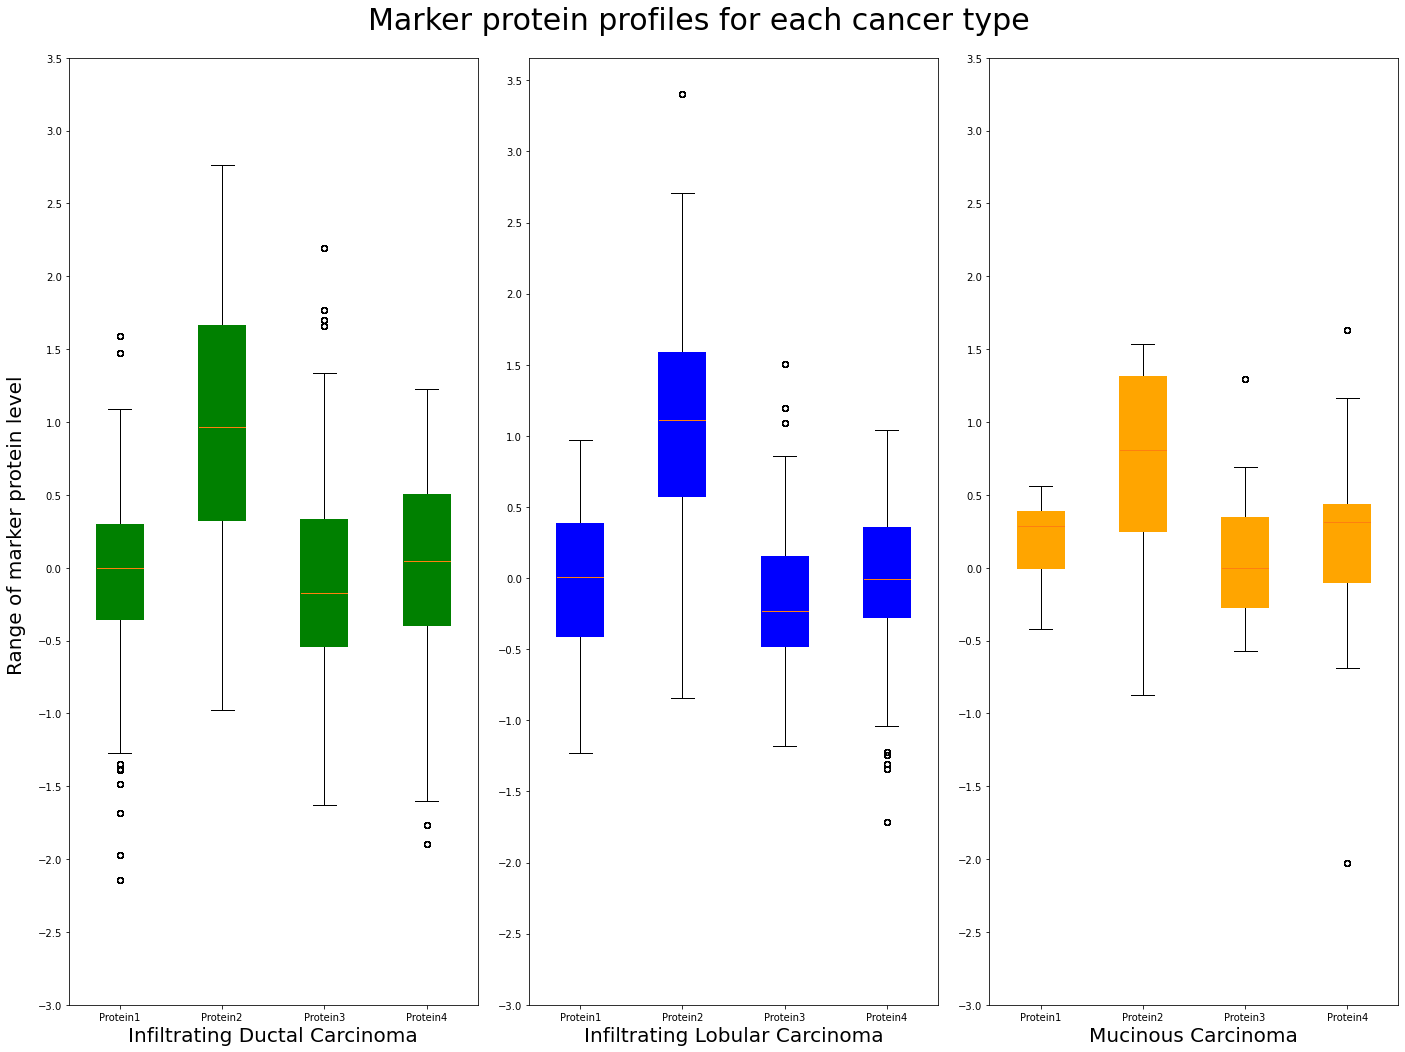

In [69]:

fig = plt.figure(figsize = (20,15))

# for the first, leftmost subplot
plt.subplot(1,3,1)
idc_boxes = plt.boxplot([list(idc[t]) for t in idc], labels = list(idc.columns), patch_artist = True)

# setting the colors for the boxplot
for box in idc_boxes['boxes']:
    # set edge color
    box.set(color = 'green', linewidth = 2)
    
    # set fill color
    box.set(facecolor = 'green')
# setting range of yticks and the labels
plt.yticks(np.arange(-3, 4, 0.5))
plt.xlabel('Infiltrating Ductal Carcinoma', fontsize = 20)


# we repeat the process for the other two subplots
plt.subplot(1,3,2)    
    
ilc_boxes = plt.boxplot([list(ilc[t]) for t in ilc], labels = list(ilc.columns), patch_artist = True)

for box in ilc_boxes['boxes']:
    # set edge color
    box.set(color = 'blue', linewidth = 2)
    
    # set fill color
    box.set(facecolor = 'blue')
plt.yticks(np.arange(-3, 4, 0.5))
plt.xlabel('Infiltrating Lobular Carcinoma', fontsize = 20)



plt.subplot(1,3,3)

mcc_boxes = plt.boxplot([list(mcc[t]) for t in mcc], labels = list(mcc.columns), patch_artist = True)

for box in mcc_boxes['boxes']:
    # set edge color
    box.set(color = 'orange', linewidth = 2)
    
    # set fill color
    box.set(facecolor = 'orange')
plt.yticks(np.arange(-3, 4, 0.5))
plt.xlabel('Mucinous Carcinoma', fontdict = {'fontsize':20})


# finally, we put in the title and labels for the overall figure
fig.suptitle('Marker protein profiles for each cancer type', fontsize = 30)
#fig.supxlabel('Marker Proteins', fontsize = 20)
fig.supylabel('Range of marker protein level', fontsize = 20)
fig.tight_layout(pad = 2)

plt.show()


In [70]:
#Protein 2 has the highest protein mean value in all types of breast-cancer.
#Also proved same results in later feature importance analysis. 


## Models Selection


In [52]:
#Split data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [53]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
res = []
method = []

In [57]:
#Using Logistic Regression Algorithm to the Training Set

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

print("Test set AUC score Logistic Regression: %f" % roc_auc_score(Y_test,Y_pred))
cmLR = confusion_matrix(Y_test, Y_pred)
AccLR = (cmLR[0][0]+cmLR[1][1])/sum(sum(cmLR))
method.append('Logistic Regression')
res.append(AccLR)
print("AccLR: %f" %AccLR)


Test set AUC score Logistic Regression: 0.500000
AccLR: 0.796875


In [15]:
#Run Logistic Regression on full feature set as Expanded Model, WITH regularization

#Will use original Train/Test split

logmodelfull_l1 = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.50, max_iter=10000)
logmodelfull_l1.fit(X_train,Y_train)

# AUC value
logmod_full_l1_pred = logmodelfull_l1.predict_proba(X_test)
print("Test set AUC score of expanded model of Logistic Regression w regularization: %f" %roc_auc_score(Y_test, logmod_full_l1_pred[:,1]))
#Accuracy data
cmEM = confusion_matrix(Y_test, Y_pred)
AccEM = (cmLR[0][0]+cmLR[1][1])/sum(sum(cmLR))
method.append('Logistic Regression')
res.append(AccEM)
print("AccEM: %f" %AccEM)

Test set AUC score of expanded model of Logistic Regression w regularization: 0.524887
AccEM: 0.796875


In [16]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
#AUC value
print("Test set AUC score KNeighborsClassifier: %f" % roc_auc_score(Y_test,Y_pred))
#Accuracy value 
cmKN = confusion_matrix(Y_test, Y_pred)
AccKN = (cmKN[0][0]+cmKN[1][1])/sum(sum(cmKN))
method.append('KNeighborsClassifier')
res.append(AccKN)
print("AccKN : %f" %AccKN)

Test set AUC score KNeighborsClassifier: 0.499246
AccKN : 0.750000


In [17]:
#Using SVC method of svm class to use Support Vector Machine Algorithm

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
#AUC value 
print("Test set AUC score SVC (Support Vector Machine Algorithm) : %f" % roc_auc_score(Y_test,Y_pred))
#Accuracy value 
cmSVCL = confusion_matrix(Y_test, Y_pred)
AccSVCL = (cmSVCL[0][0]+cmSVCL[1][1])/sum(sum(cmSVCL))
method.append('SVC method linear')
res.append(AccSVCL)

print("AccSVCL : %f" %AccSVCL)

Test set AUC score SVC (Support Vector Machine Algorithm) : 0.500000
AccSVCL : 0.796875


In [18]:
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
#AUC value 
print("Test set AUC score SVC (Kernel SVM Algorithm): %f" % roc_auc_score(Y_test,Y_pred))
#ACCURACY VALUE 
cmSVCr = confusion_matrix(Y_test, Y_pred)
AccSVCr = (cmSVCr[0][0]+cmSVCr[1][1])/sum(sum(cmSVCr))
method.append('SVC method rbf')
res.append(AccSVCr)
print("AccSVCr : %f" %AccSVCr)

Test set AUC score SVC (Kernel SVM Algorithm): 0.500000
AccSVCr : 0.796875


In [20]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
#AUC value 
print("Test set AUC score DecisionTreeClassifier: %f" % roc_auc_score(Y_test,Y_pred))
cmDT = confusion_matrix(Y_test, Y_pred)
AccDT = (cmDT[0][0]+cmDT[1][1])/sum(sum(cmDT))
method.append('DecisionTreeClassifier')
res.append(AccDT)
#ACCURACY 
print("AccDT : %f" %AccDT)

Test set AUC score DecisionTreeClassifier: 0.633484
AccDT : 0.781250


In [21]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
#AUC VALUE 
print("Test set AUC score RandomForestClassifier: %f" % roc_auc_score(Y_test,Y_pred))
#ACCURACY 
cmRF = confusion_matrix(Y_test, Y_pred)
AccRF = (cmRF[0][0]+cmRF[1][1])/sum(sum(cmRF))
method.append('RandomForestClassifier')
res.append(AccRF)
print("AccRF : %f" %AccRF)


Test set AUC score RandomForestClassifier: 0.470588
AccRF : 0.750000


## The Feature Importance

In [22]:
## The feature importance corresponds to each feature
print("RandomForest max_features: ", classifier.max_features)
classifier.feature_importances_
X_col_names = X.columns
feat_imp_df = pd.DataFrame({'feature': X_col_names
                              ,'importance': classifier.feature_importances_})\
                            .sort_values('importance', ascending=False)
feat_imp_df

RandomForest max_features:  auto


,feature,importance
3,Protein2,0.181473
5,Protein4,0.177755
0,Age,0.175736
4,Protein3,0.168822
2,Protein1,0.125907
9,Surgery_type,0.069153
6,Tumour_Stage,0.054318
7,Histology,0.033949
8,HER2 status,0.009962
1,Gender,0.002926


[Text(0.5, 1.0, 'Feature Importance')]

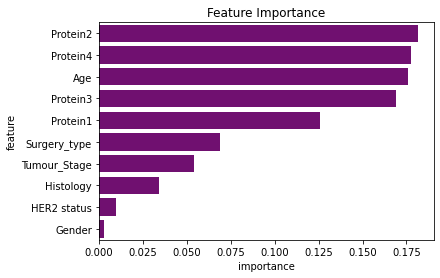

In [23]:
#plt.figure(figsize(15,20))
sns.barplot(x=feat_imp_df['importance']
            , y=feat_imp_df['feature']
            , color='purple').set(title="Feature Importance")

By comparing the error metrics of models and due to the skewed characteristic of the dataset, instead of focusing on accuracy, I depend on four other metrics to figure the best performed model which is decision trees and it has 0.63 AUC, 0.85 precision, 0.88 recall and 0.87 F1 score.

And we found all four protein type and age are top five important features.
